### Importação das bibliotecas

In [437]:
import pandas as pd
import matplotlib.pyplot as plt

### Lendo o arquivo _googleplaystore.csv_

In [438]:
caminho_arquivo = 'googleplaystore.csv'
df = pd.read_csv(caminho_arquivo)

### Exibindo as primeiras linhas do dataset

In [439]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Removendo as linhas duplicadas

In [440]:
df_limpo = df.drop_duplicates()

print(f"Número de linhas antes da remoção de duplicatas: {len(df)}")
print(f"Número de linhas após a remoção de duplicatas: {len(df_limpo)}")

Número de linhas antes da remoção de duplicatas: 10841
Número de linhas após a remoção de duplicatas: 10358


## Gráfico de barras com os **top 5 apps por número de instalação**:

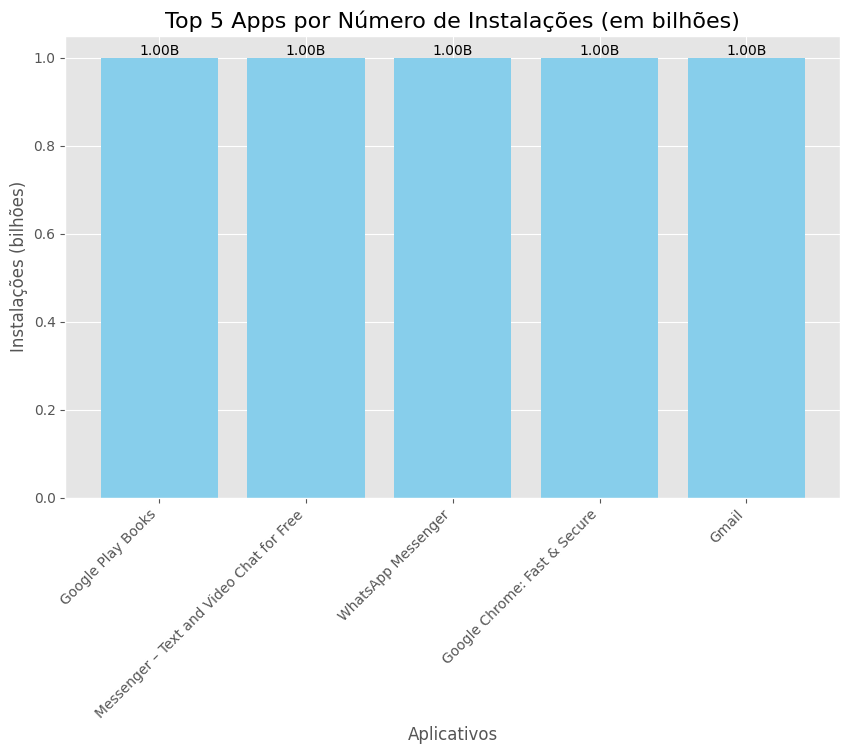

In [441]:
plt.style.use('ggplot')
df_limpo = df_limpo[df_limpo['Installs'].str.contains(r'^\d', na=False)]
df_limpo['Installs'] = df_limpo['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

top_5_apps = df_limpo.nlargest(5, 'Installs')[['App', 'Installs']]

top_5_apps['Installs'] = top_5_apps['Installs'] / 1_000_000_000

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}B', ha='center', va='bottom')

plt.title('Top 5 Apps por Número de Instalações (em bilhões)', fontsize=16)
plt.xlabel('Aplicativos', fontsize=12)
plt.ylabel('Instalações (bilhões)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()


## Gráfico: Categoria dos apps

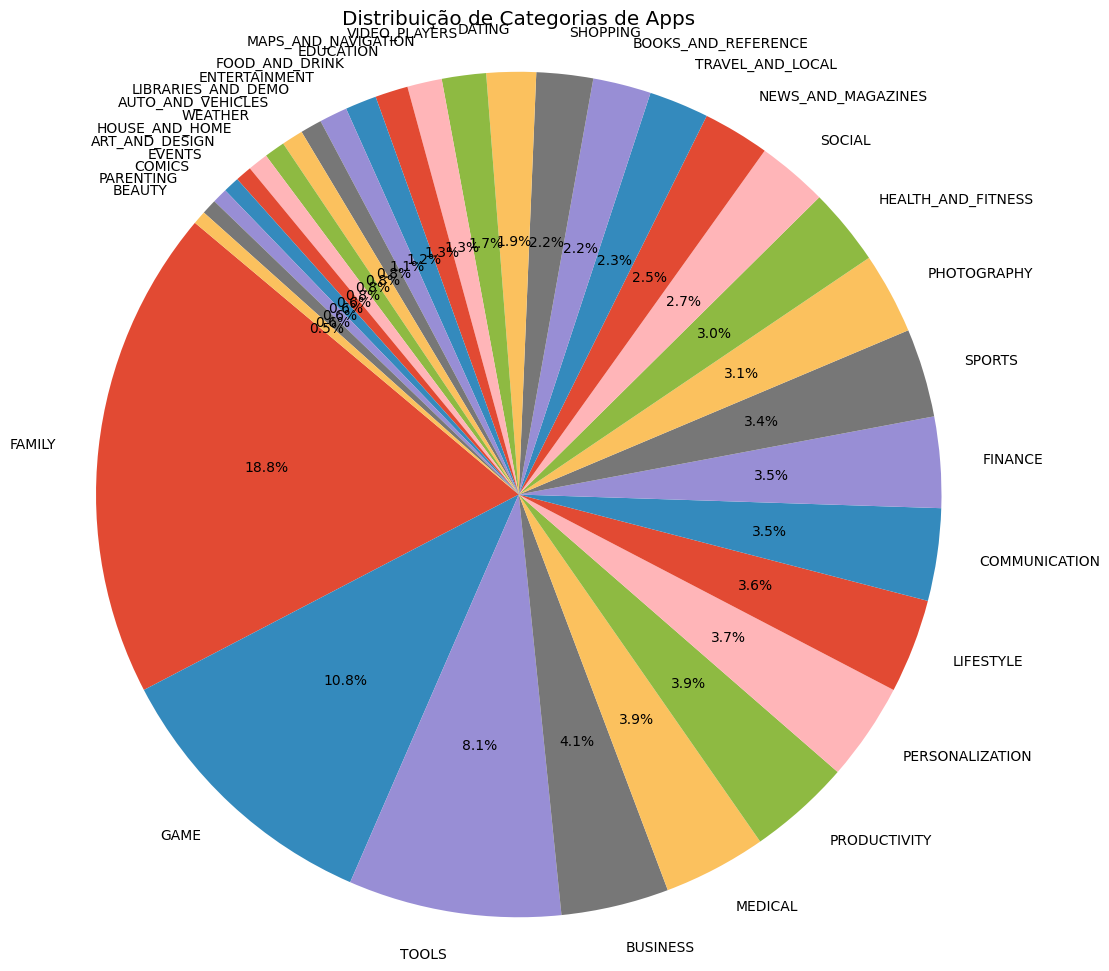

In [442]:
categorias_frequencia = df_limpo['Category'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(categorias_frequencia, labels=categorias_frequencia.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Categorias de Apps')
plt.axis('equal')  
plt.show()


## App mais caro

In [443]:
df = df[df['Price'].str.contains(r'^\$?\d+\.?\d*$', na=False)]
df = df[df['Price'].str.match(r'^\$?\d+(\.\d+)?$', na=False)]
df['Price'] = df['Price'].str.replace('$', '').astype(float)

app_mais_caro = df.loc[df['Price'].idxmax()][['App', 'Price']]
print("App mais caro:", app_mais_caro)

App mais caro: App      I'm Rich - Trump Edition
Price                       400.0
Name: 4367, dtype: object


## 5. Mostrando quantos apps são classificados como 'Mature 17+'

In [444]:
quantidade_mature = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print("Número de apps classificados como 'Mature 17+':", quantidade_mature)

Número de apps classificados como 'Mature 17+': 499


## 6. Mostrando o top 10 apps por número de reviews

In [445]:
df['Reviews'] = df['Reviews'].str.replace(',', '').astype(int)
top_10_reviews = df.nlargest(10, 'Reviews')[['App', 'Reviews']]
top_10_reviews['Reviews'] = top_10_reviews['Reviews'] / 1_000_000
print(top_10_reviews)

                                           App    Reviews
2544                                  Facebook  78.158306
3943                                  Facebook  78.128208
336                         WhatsApp Messenger  69.119316
381                         WhatsApp Messenger  69.119316
3904                        WhatsApp Messenger  69.109672
2604                                 Instagram  66.577446
2545                                 Instagram  66.577313
2611                                 Instagram  66.577313
3909                                 Instagram  66.509917
382   Messenger – Text and Video Chat for Free  56.646578


## 7.  Cálculos sobre o dataset

### a. Top 5 apps por média de avaliação

In [446]:
top_5_rating = df.nlargest(5, 'Rating')[['App', 'Rating']]
print("Top 5 apps por média de avaliação:")
print(top_5_rating)

Top 5 apps por média de avaliação:
                                            App  Rating
329                Hojiboy Tojiboyev Life Hacks     5.0
612               American Girls Mobile Numbers     5.0
615                                Awake Dating     5.0
633                       Spine- The dating app     5.0
636  Girls Live Talk - Free Text and Video Chat     5.0


### b. Número total de aplicativos no dataset

In [447]:
total_apps = df.shape[0]
print("Número total de aplicativos no dataset:", total_apps)

Número total de aplicativos no dataset: 10840


## 8. Criando pelo menos outras 3 formas gráficas de exibição dos indicadores.

top 10 apps por número de reviews gráfico

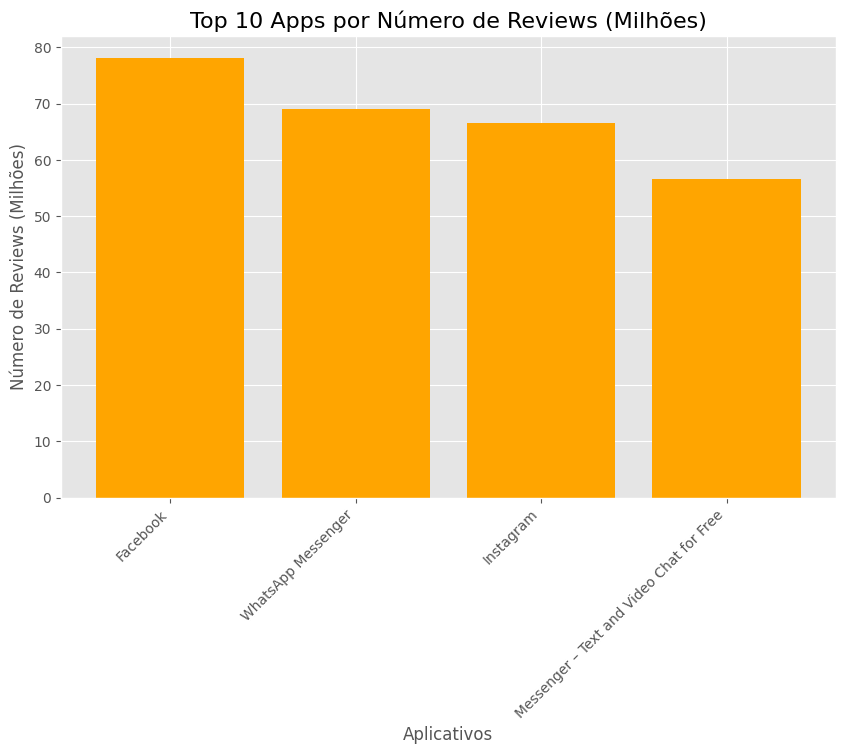

In [448]:

plt.figure(figsize=(10, 6))
plt.bar(top_10_reviews['App'], top_10_reviews['Reviews'], color='orange')
plt.title('Top 10 Apps por Número de Reviews (Milhões)', fontsize=16)
plt.xlabel('Aplicativos', fontsize=12)
plt.ylabel('Número de Reviews (Milhões)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### Dispersão entre Tamanho do Aplicativo (MB) e Número de Instalações

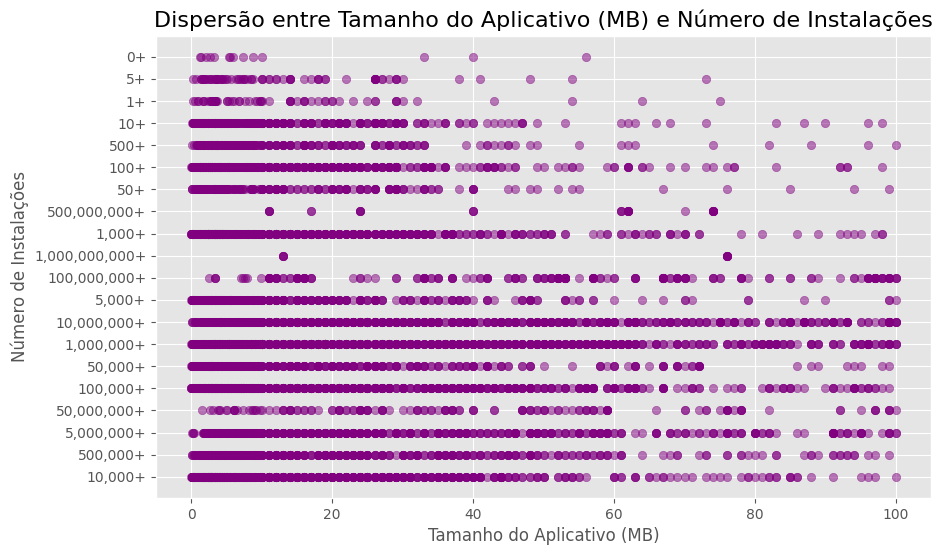

In [449]:

df['Size'] = df['Size'].replace('Varies with device', None)
df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('k', 'e3')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Size_MB'] = df['Size'] / 1_000_000
plt.figure(figsize=(10, 6))
plt.scatter(df['Size_MB'], df['Installs'], alpha=0.5, color='purple')
plt.title('Dispersão entre Tamanho do Aplicativo (MB) e Número de Instalações', fontsize=16)
plt.xlabel('Tamanho do Aplicativo (MB)', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)
plt.grid(True)
plt.show()

### Média de Avaliação por Gênero de Aplicativo

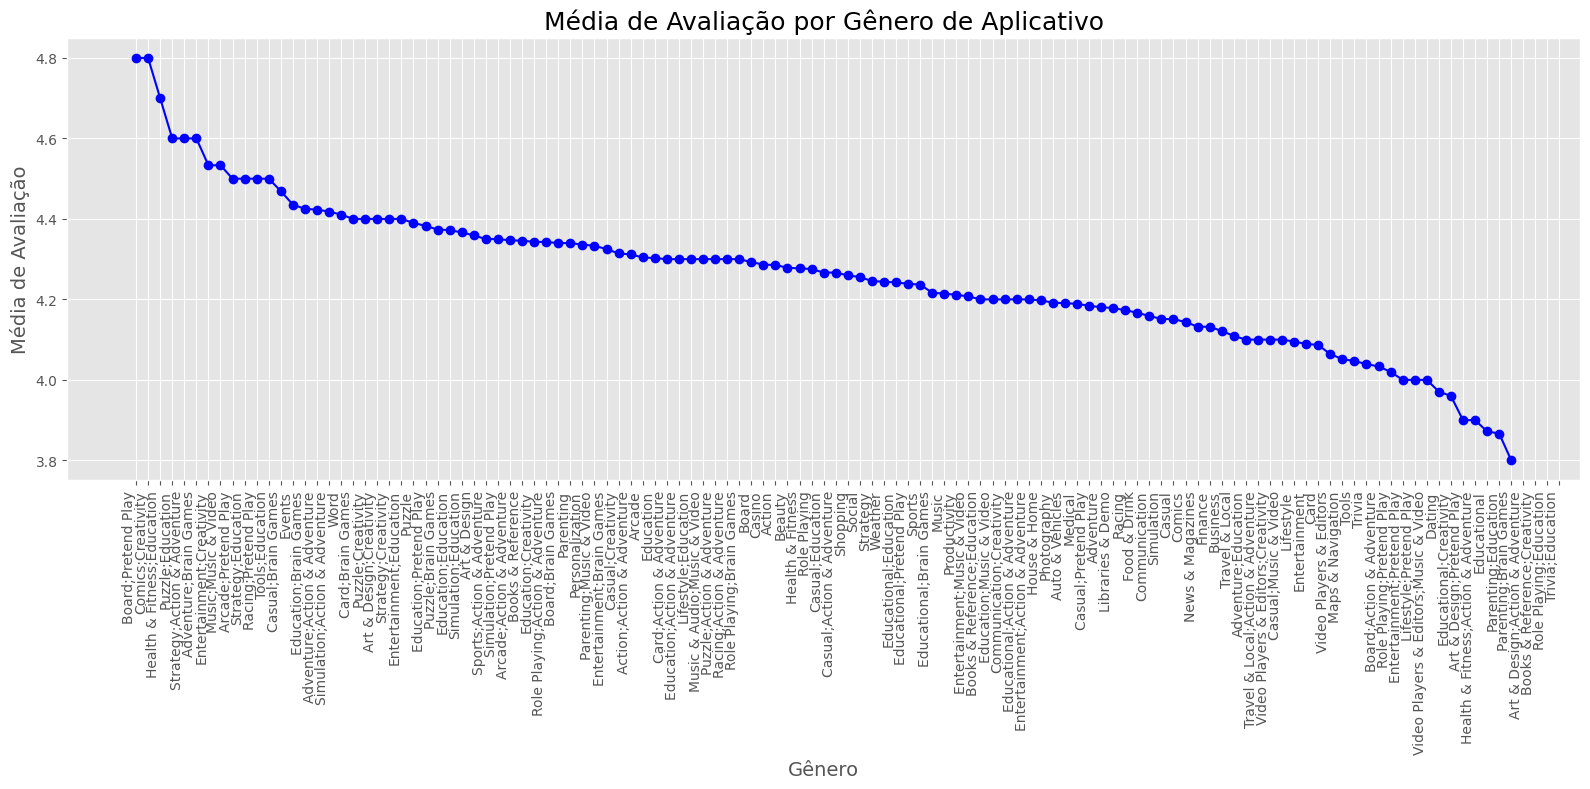

In [450]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

media_avaliacao_por_genero = df.groupby('Genres')['Rating'].mean().reset_index()

media_avaliacao_por_genero = media_avaliacao_por_genero.sort_values(by='Rating', ascending=False)
plt.figure(figsize=(16, 8)) 

plt.plot(media_avaliacao_por_genero['Genres'], media_avaliacao_por_genero['Rating'], marker='o', color='blue')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.3) 

plt.title('Média de Avaliação por Gênero de Aplicativo', fontsize=18)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Média de Avaliação', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()